![Survey](images/survey_text.png "Survey")

In [1]:
import pandas as pd
import numpy as np
brand_ratings = pd.read_csv('data/007_ratings.csv')
brand_ratings.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [2]:
brand_ratings.tail()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j
999,7,4,7,8,4,1,2,5,1,j


In [3]:
brand_ratings.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,4.49,4.42,6.20,6.07,4.32,4.26,4.34,5.22,3.73
std,3.20,2.61,3.08,2.74,2.78,2.67,2.40,2.74,2.54
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,2.00,4.00,4.00,2.00,2.00,2.00,3.00,1.00
50%,4.00,4.00,7.00,6.00,4.00,4.00,4.00,5.00,3.00
75%,7.00,6.00,9.00,8.00,6.00,6.00,6.00,7.00,5.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


<AxesSubplot:>

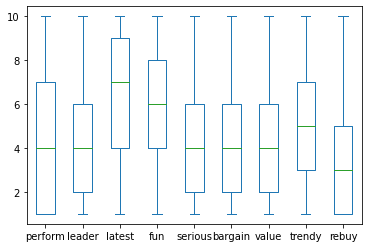

In [4]:
# To check distribution of data set.
brand_ratings.plot.box()

### Rescaling the Data

In [5]:
from sklearn.preprocessing import scale
brand_ratings_sc = brand_ratings.copy()
brand_ratings_sc.iloc[:, :-1] = scale(brand_ratings_sc.iloc[:, :-1])
brand_ratings_sc.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.09,-1.31,-1.69,-1.85,-1.20,-1.22,-1.39,-1.54,-1.07
25%,-1.09,-0.93,-0.71,-0.75,-0.84,-0.85,-0.97,-0.81,-1.07
50%,-0.15,-0.16,0.26,-0.02,-0.12,-0.10,-0.14,-0.08,-0.29
75%,0.78,0.61,0.91,0.70,0.60,0.65,0.69,0.65,0.50
max,1.72,2.14,1.24,1.43,2.04,2.15,2.36,1.74,2.47


<AxesSubplot:>

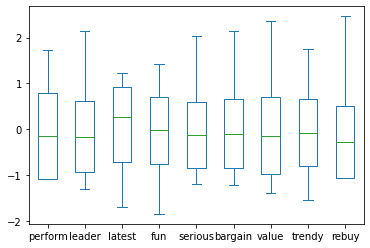

In [6]:
brand_ratings_sc.plot.box()

In [7]:
brand_ratings_sc.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.77705,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.08937,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.77705,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.08937,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.08937,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a


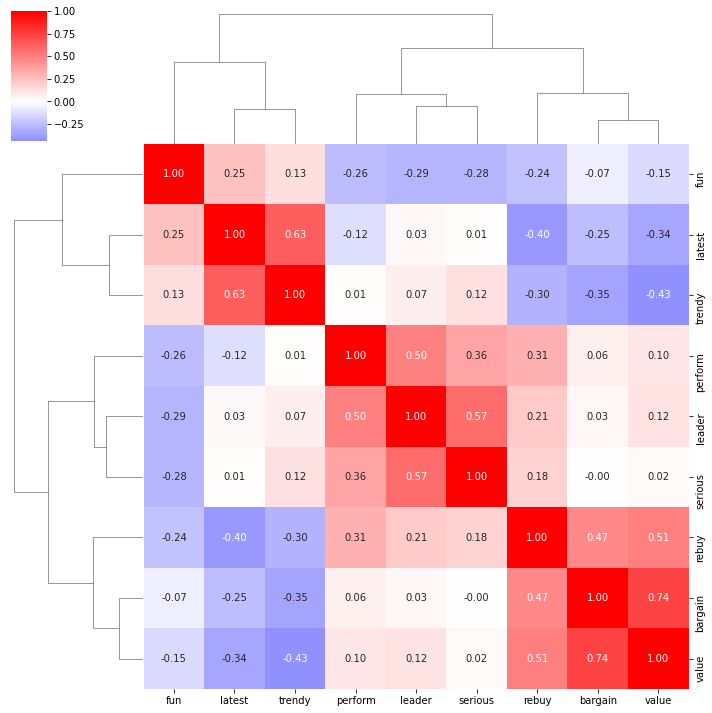

In [8]:
# Using clustermap() rather than heatmap(), reorders the rows and columns
# according to variables' similarity in a hierarchical cluster solution such
# that adjectives close to each other (such as rebuy, bargain, value) are plotted
# adjacent to each other.

# Data appears to show three general clusters that
# comprise fun/latest/trendy, rebuy/bargain/value,
# and perform/leader/serious respectively.

import matplotlib.pyplot as plt
import seaborn as sns

sns.clustermap(brand_ratings.corr(), annot=True, fmt=".2f",
               center=0, cmap=plt.cm.bwr)

### Aggregate Mean Ratings by Brand

In [9]:
brand_means = brand_ratings.groupby('brand').mean()
brand_means

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
b,7.47,7.21,8.43,3.40,7.61,4.37,4.70,7.25,4.33
c,6.57,7.45,5.88,3.75,7.72,2.64,3.28,5.29,3.39
d,2.31,2.87,7.28,6.58,2.40,1.91,2.10,7.24,2.47
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
f,4.30,5.12,2.31,5.47,5.96,6.59,6.79,2.99,7.18
g,7.43,3.98,2.24,4.65,2.84,6.65,7.35,1.72,7.19
h,4.44,3.64,7.74,8.03,3.93,2.29,2.46,7.59,2.19
i,5.56,3.58,7.29,7.20,3.91,3.58,2.41,6.84,3.21


<AxesSubplot:ylabel='brand'>

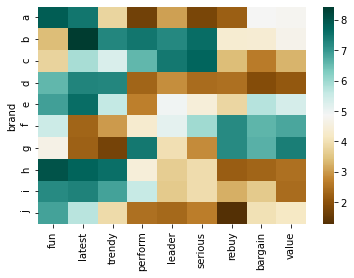

In [10]:
# A heatmap and clustermap of the mean of each adjective by brand. Brands f and g
# are similar — with high ratings (in green) for rebuy and value but low ratings
# for latest and fun. Other groups of similar brands are b/c, i/h/d, and a/j.

from matplotlib import cm

sns.heatmap(brand_means[['fun', 'latest', 'trendy', 'perform',
                         'leader', 'serious', 'rebuy', 'bargain',
                         'value']], cmap=cm.BrBG)

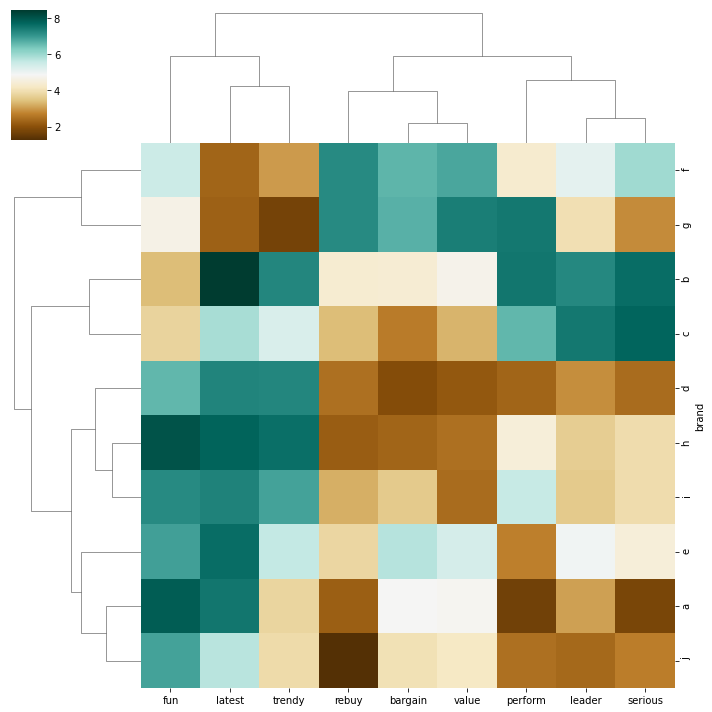

In [11]:
sns.clustermap(brand_means, cmap=cm.BrBG)

## Principal Component Analysis and Perceptual Maps

In [12]:
def pca_summary(pca, round_dig=3):
  '''Print a summary of the PCA fit'''
  return pd.DataFrame(
      [pca.explained_variance_,
       pca.explained_variance_ratio_,
       np.cumsum(pca.explained_variance_ratio_)],
       columns=['pc{}'.format(i) for i in
                range(1, 1+len(pca.explained_variance_))],
       index=['variance', 'proportion of variance explained',
              'cumulative proportion']
              ).round(round_dig)

In [13]:
def pca_components(pca, variable_names):
  '''Return loading of variables on specific components in the PCA'''
  return pd.DataFrame(pca.components_,
                      index=['pc{}'.format(i+1)
                             for i in range(len(pca.components_))],
                      columns=variable_names).T

### Visualizing PCA

In [14]:
def plot_arrow_component(pca_components, variable, scale=1):
  '''Plot an arrow of component dimensions in PCA space'''
  plt.arrow(x=0, y=0,
            dx=pca_components.loc[variable]['pc1'] * scale,
            dy=pca_components.loc[variable]['pc2'] * scale,
            color='r',
            head_width=.5, overhang=1)
  plt.text(x=pca_components.loc[variable]['pc1'] * scale,
           y=pca_components.loc[variable]['pc2'] * scale,
           s=variable,
           color='r',
           fontsize=16)

In [15]:
def biplot(values_transformed, pca_components, label=[]):
  '''Create a biplot, a scatterplot of points in PCA space with arrows
  representing the loadings of each variable.
  Points can optionally be labelled'''
  scale = 1.2* np.max(values_transformed[:,1])
  plt.figure(figsize=(10, 10))
  for v in pca_components.index:
    plot_arrow_component(pca_components, v, scale)
  plt.scatter(x=values_transformed[:,0],
              y=values_transformed[:,1],
              color='gray', s=4)
  if len(label) == values_transformed.shape[0]:
    for i, txt in enumerate(label):
      plt.text(s=txt,
               x=values_transformed[i,0]+.01*scale,
               y=values_transformed[i,1]+.01*scale,
               fontsize=14)
  plt.xlabel('PC1')
  plt.ylabel('PC2')

### PCA for Brand Ratings

In [16]:
from sklearn import decomposition
brand_rating_names = brand_ratings_sc.columns[:-1]
brand_ratings_sc_vals = brand_ratings_sc[brand_rating_names]
brand_pca = decomposition.PCA().fit(brand_ratings_sc_vals)

In [17]:
# Shows variance and variance explained by each component. 
pca_summary(brand_pca)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
variance,2.982,2.099,1.080,0.728,0.638,0.535,0.390,0.312,0.243
proportion of variance explained,0.331,0.233,0.120,0.081,0.071,0.059,0.043,0.035,0.027
cumulative proportion,0.331,0.564,0.684,0.765,0.836,0.895,0.938,0.973,1.000


Text(0, 0.5, 'Variance')

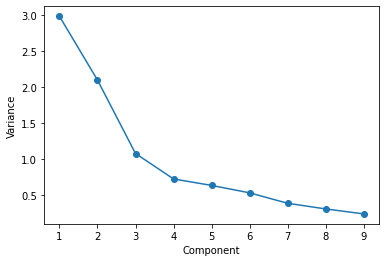

In [18]:
plt.plot(1+np.arange(len(brand_pca.explained_variance_)),
         brand_pca.explained_variance_, 'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

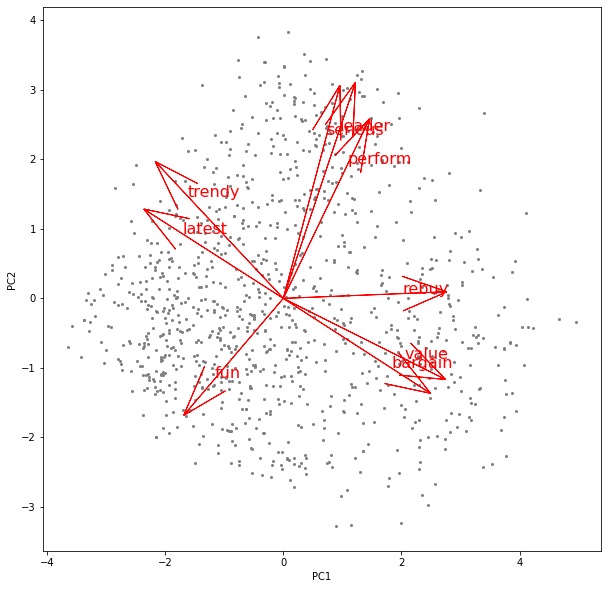

In [19]:
# Although we see adjective groupings on the variable loading arrows in red, and gain some insight
# into the areas where ratings cluster (as dense areas of observation points), the chart would be
# more useful if the data were first aggregated by brand.

brand_ratings_sc_trans = brand_pca.transform(brand_ratings_sc_vals)
brand_pca_components = pca_components(brand_pca, brand_rating_names)
biplot(brand_ratings_sc_trans, brand_pca_components)

### Perceptual Map of the Brands

In [20]:
brand_means_sc = brand_ratings_sc.groupby('brand').mean()
brand_means_sc.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,-0.886362,-0.528168,0.411179,0.656974,-0.919400,0.214203,0.184785,-0.525407,-0.596465
b,0.931336,1.071294,0.726470,-0.972701,1.183733,0.041640,0.151415,0.740679,0.237092
c,0.650249,1.163350,-0.102388,-0.845098,1.223346,-0.607347,-0.440898,0.025541,-0.132504
d,-0.680231,-0.593373,0.352671,0.186665,-0.692521,-0.881197,-0.933102,0.737030,-0.494236
e,-0.564673,0.192933,0.456685,0.296039,0.042135,0.551826,0.418373,0.138649,0.036566


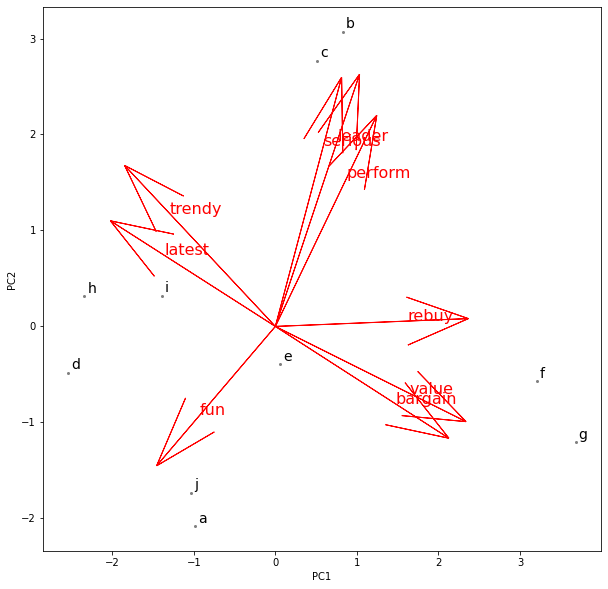

In [21]:
# Brands f and g are high on "value" for instance, while a and j are relatively high on "fun"
# which is opposite in direction from leadership adjectives ("leader" and "serious").
brand_means_sc = (
    ((brand_means_sc - brand_means_sc.mean()) / brand_means_sc.std()))
brand_means_sc_transformed = brand_pca.transform(brand_means_sc)
biplot(brand_means_sc_transformed, brand_pca_components,
       label=brand_means.index)

In [22]:
# Suppose that you are the brand manager for brand e. What does the map tell you?
# For one thing, your brand is in the center and thus appears not to be 
# well-differentiated on any of the dimensions. That could be good or bad,
# depending on your strategic goals. If your goal is to be a safe brand
# that appeals to many consumers, then a relatively undifferentiated position 
# like e could be desirable.
# What should you do about the position of your brand e? Again, it depends on the strategic goals.
# If you wish to increase differentiation, one possibility would be to take action to shift your 
# brand in some direction on the map. Suppose you wanted to move in the direction of brand c. 
# You could look at the specific differences from c in the data.

# This shows you that e is relatively stronger than c on "bargain" and "fun", which suggests 
# dialing down messaging or other attributes that reinforce those (assuming, of course, that you
# truly want to move in the direction of c). Similarly, c is stronger
# on "perform" and "serious" so those could be aspects of the product or message for e to strengthen.
# Another option would be not to follow another brand but to aim for differentiated space where no
# brand is positioned.

brand_means_sc.loc['c'] - brand_means_sc.loc['e']

perform    1.775362
leader     1.440484
latest    -0.774450
fun       -1.886670
serious    1.544750
bargain   -1.811159
value     -1.131735
trendy    -0.151604
rebuy     -0.212361
dtype: float64

In [23]:
# There is a large gap between the group b and c on versus f and g. This area might be described as
# the "value leader" area or similar. How do we ﬁnd out how to position there? Let's assume that the
# gap reﬂects approximately the average of those four brands. We can ﬁnd that average as the mean of
# the brands' rows, and then take the difference of e from that average:

brand_means_sc.loc[['b','c','f','g']].mean(axis=0) - brand_means_sc.loc['e']

perform    1.717172
leader     0.580749
latest    -1.299004
fun       -1.544598
serious    0.750005
bargain   -0.391245
value      0.104383
trendy    -0.629646
rebuy      0.840802
dtype: float64

There are important caveats in interpreting perceptual maps. First, you must choose the level and type of aggregation carefully. We demonstrated the maps using mean rating by brand, but depending on the data and question at hand, it might be more suitable to use median (for ordinal data) or even modal response (for categorical data). You should check that the dimensions are similar for the full data and aggregated data before interpreting aggregate maps. <br>
Second, the relationships are strictly relative to the product category and the brands and adjectives that are tested. In a different product category, or with different brands, adjectives such as "fun" and "leader" could have a very different relationship.


## Exploratory Factor Analysis

### Finding an EFA Solution

In [24]:
# The first step in exploratory factor analysis is to determine the number of factors to estimate.
# A way to do this is to use a scree plot, and to retain factors where the eigenvalue (a metric for
# proportion of variance explained) is greater than 1.0.
# The first three eigenvalues are greater than 1.0, although barely so for the third value. This
# again suggests three or possibly two factors.
np.linalg.eig(np.corrcoef(brand_ratings_sc_vals.T))[0]

array([2.97929556, 2.09655168, 1.07925487, 0.72721099, 0.63754592,
       0.53484323, 0.39010444, 0.24314689, 0.31204642])

In [25]:
brand_2fa = decomposition.FactorAnalysis(n_components=2)
brand_2fa.fit(brand_ratings_sc_vals)

FactorAnalysis(n_components=2)

In [26]:
pca_components(brand_2fa, brand_rating_names)


,pc1,pc2
perform,0.235994,0.556420
leader,0.238080,0.780335
latest,-0.441472,0.101670
fun,-0.241319,-0.327027
serious,0.141222,0.674193
bargain,0.780184,-0.194738
value,0.867785,-0.138932
trendy,-0.488965,0.232029
rebuy,0.633149,0.126516


In [27]:
brand_ratings_sc.columns

Index(['perform', 'leader', 'latest', 'fun', 'serious', 'bargain', 'value',
       'trendy', 'rebuy', 'brand'],
      dtype='object')

In [28]:
import sys
!{sys.executable} -m pip install factor_analyzer

You should consider upgrading via the 'C:\Users\Stefan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [29]:
# In the 2-factor solution, factor 0 loads strongly on "bargain" and "value" and therefore might be
# interpreted as a "value" factor while factor 1 loads on "leader" and "serious" and thus might be
# regarded as a "category leader" factor. This is not a bad interpretation, but let's compare it to
# a 3-factor solution.
import factor_analyzer

fa = factor_analyzer.FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_rating_names).round(2)

,0,1
perform,0.09,0.60
leader,-0.02,0.81
latest,-0.59,-0.04
fun,-0.19,-0.39
serious,-0.07,0.68
bargain,0.69,0.05
value,0.78,0.11
trendy,-0.65,0.10
rebuy,0.60,0.33


In [30]:
# The 3-factor solution retains the "value" and "leader" factors (factors 0 and 1 in the output) and
# adds a clear "latest" factor (factor 2) that loads strongly on "latest" and "trendy". This adds an
# easily interpretable concept to our understanding of the data. It also aligns with the bulk of 
# suggestions from the scree and eigen tests, and fits well with the perceptual maps we saw, where
# those adjectives were in a differentiated space. So we regard the 3-factor model as superior to the
# 2-factor model because the factors are more interpretable. 
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_rating_names).round(2)

,0,1,2
perform,0.07,0.60,-0.06
leader,0.06,0.80,0.10
latest,-0.16,-0.08,0.98
fun,-0.07,-0.41,0.21
serious,-0.01,0.68,0.08
bargain,0.84,-0.00,-0.11
value,0.85,0.08,-0.21
trendy,-0.35,0.08,0.59
rebuy,0.50,0.32,-0.30


A factor analysis solution can rotated to have new loadings that account for the same proportion
of variance: do you wish to allow the factors to be correlated with one another or not? Do you think the factors should be conceptually independent, or does it make more sense to consider them to be related? The default in general is to find factors that have zero correlation (using a varimax rotation).

In [31]:
# We might judge that value and leader are reasonably expected to be related; in many categories, 
# the leader can command a price premium, and thus we might expect those two latent constructs to be
# negatively correlated rather than independent of one another. This suggests that we could allow
# correlated factors in our solution. This is known as an oblique rotation ("oblique" because the
# dimensional axes are not perpendicular but are skewed by the correlation between factors).

# When we compare this oblimin result to the default varimax rotation above, we see the loadings are
# slightly different for the relationships of the factors to the adjectives. However, the loadings
# are similar enough in this case that there is no substantial change in how we would interpret the
# factors.

fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
fa.fit(brand_ratings_sc_vals)
fa_loadings_df = pd.DataFrame(fa.loadings_, index=brand_rating_names)
fa_loadings_df.round(2)

,0,1,2
perform,0.01,0.60,-0.09
leader,0.02,0.81,0.07
latest,0.03,-0.00,1.01
fun,0.00,-0.39,0.24
serious,-0.05,0.68,0.03
bargain,0.88,-0.05,0.07
value,0.86,0.03,-0.04
trendy,-0.26,0.14,0.54
rebuy,0.45,0.28,-0.22


In [32]:
# We can check the factor correlation matrix showing the relationships between the estimated latent
# factors. Factor 1 (value) is negatively correlated with Factor 3 (latest), r = −0.41, and is 
# essentially uncorrelated with Factor 2 (leader), r = 0.13.
# The negative correlation between factors 1 and 3 is consistent with our theory that brands that
# are value brands are less likely to be trendy, and thus we think this is a more interpretable
# result.
np.corrcoef(fa.transform(brand_ratings_sc_vals).T)

array([[ 1.        ,  0.12904599, -0.41410012],
       [ 0.12904599,  1.        , -0.04888392],
       [-0.41410012, -0.04888392,  1.        ]])

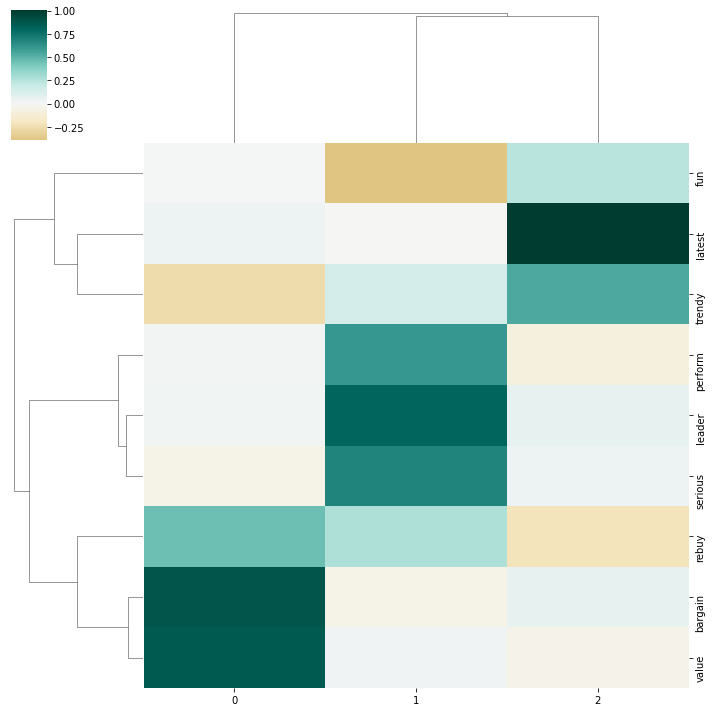

In [33]:
# Shows a distinct separation of items into three factors, which are roughly interpretable as value,
# leader, and latest. Note that the item rebuy, which reflects stated intention to repurchase, loads
# on both Factor1 (value) and Factor2 (leader). This suggests that in our simulated data, consumers
# say they would rebuy a brand for either reason, because it is a good value or because it is a leader.
sns.clustermap(fa_loadings_df, cmap=cm.BrBG, center=0)

### Using Factor Scores for Brands
Use the factor scores to determine brands' positions.

In [34]:
# The result is an estimated score for each respondent on each factor and brand.
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
brand_ratings_fa_trans = fa.fit_transform(brand_ratings_sc_vals)
brand_rating_fa_scores = pd.DataFrame(brand_ratings_fa_trans)
brand_rating_fa_scores['brand'] = brand_ratings_sc.brand
brand_rating_fa_scores.head()

,0,1,2,brand
0,1.388590,-0.491354,0.531693,a
1,-1.188916,-1.352280,-0.658905,a
2,1.038597,-0.801256,-0.372207,a
3,0.037803,-0.318029,1.190962,a
4,1.688281,-1.525753,-0.453958,a


In [35]:
# To find the overall position for a brand, we aggregate the individual scores by brand.
brand_rating_fa_mean = brand_rating_fa_scores.groupby('brand').mean()
brand_rating_fa_mean.columns = ['Value', 'Leader', 'Latest']
brand_rating_fa_mean.round(3)

,Value,Leader,Latest
brand,,,
a,0.147,-0.863,0.388
b,0.067,1.205,0.710
c,-0.492,1.120,-0.077
d,-0.921,-0.625,0.368
e,0.416,-0.035,0.437
f,1.048,0.406,-1.265
g,1.236,0.086,-1.326
h,-0.804,-0.271,0.528
i,-0.555,-0.169,0.388


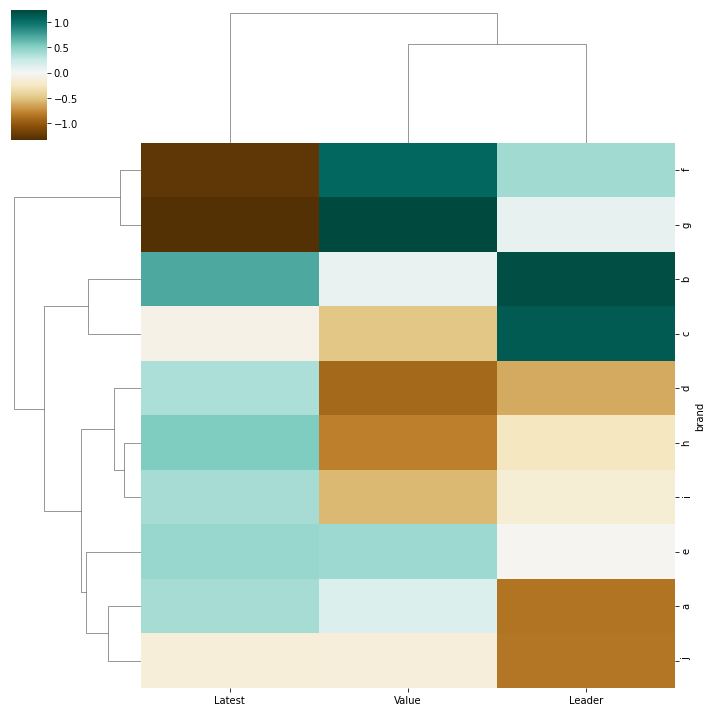

In [36]:
# And clustermap the scores by brand.
sns.clustermap(brand_rating_fa_mean, cmap=cm.BrBG, center=0)

## Manifold dimensionality reduction techniques
Multidimensional scaling (MDS) is a family of procedures that can also be used to ﬁnd lower-dimensional representations of
data. Instead of extracting underlying components or latent factors, MDS works instead with a distance matrix (also known as
a similarity matrix). MDS attempts to ﬁnd a lower-dimensional map that best preserves all the observed similarities between
items.

### Multidimensional Scaling
We generally recommend principal component analysis as a more informative procedure than multidimensional scaling for typical metric or near-metric (e.g., survey Likert scale) data. However, PCA will not work with non-metric data. In those cases, multidimensional scaling is a valuable alternative.

In [37]:
brand_means

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
b,7.47,7.21,8.43,3.40,7.61,4.37,4.70,7.25,4.33
c,6.57,7.45,5.88,3.75,7.72,2.64,3.28,5.29,3.39
d,2.31,2.87,7.28,6.58,2.40,1.91,2.10,7.24,2.47
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
f,4.30,5.12,2.31,5.47,5.96,6.59,6.79,2.99,7.18
g,7.43,3.98,2.24,4.65,2.84,6.65,7.35,1.72,7.19
h,4.44,3.64,7.74,8.03,3.93,2.29,2.46,7.59,2.19
i,5.56,3.58,7.29,7.20,3.91,3.58,2.41,6.84,3.21


In [38]:
# sklearn manifold: It calculates pairwise Euclidean distances and then looks for lower-dimensional
# representations.
from sklearn import manifold

np.random.seed(889783)
brand_mds = manifold.MDS().fit_transform(brand_means)
brand_mds

array([[ 0.59217926,  5.19146726],
       [-2.74412002, -6.30675543],
       [-0.51645595, -5.64921129],
       [-4.33444294,  3.51765049],
       [ 0.69182752,  0.80286252],
       [ 6.14100233, -2.84581818],
       [ 8.40903503, -0.33459353],
       [-4.67731306,  1.14429619],
       [-3.16204417,  0.12390567],
       [-0.399668  ,  4.35619632]])

<ipython-input-39-fa64d9c18d63>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=brand_means.index[i], xy=p+.1)


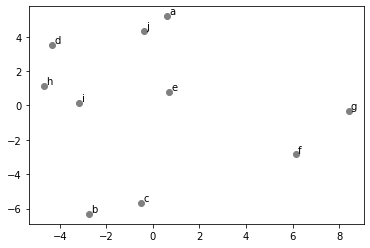

In [39]:
# Plots multidimensional scaling chart for mean brand rating.
plt.scatter(x=brand_mds[:,0],
            y=brand_mds[:,1],
            color='grey')
for i,p in enumerate(brand_mds):
  plt.annotate(s=brand_means.index[i], xy=p+.1)

### Non-metric MDS
For non-metric data such as rankings or categorical variables.

In [40]:
brand_means

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
b,7.47,7.21,8.43,3.40,7.61,4.37,4.70,7.25,4.33
c,6.57,7.45,5.88,3.75,7.72,2.64,3.28,5.29,3.39
d,2.31,2.87,7.28,6.58,2.40,1.91,2.10,7.24,2.47
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
f,4.30,5.12,2.31,5.47,5.96,6.59,6.79,2.99,7.18
g,7.43,3.98,2.24,4.65,2.84,6.65,7.35,1.72,7.19
h,4.44,3.64,7.74,8.03,3.93,2.29,2.46,7.59,2.19
i,5.56,3.58,7.29,7.20,3.91,3.58,2.41,6.84,3.21


In [41]:
# For purposes of illustration, let's convert the mean ratings to rankings instead of raw values;
# this will be non-metric, ordinal data. 
brand_ranks = brand_means.apply(lambda col: col.argsort().argsort())
brand_ranks

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,0,2,6,8,0,6,6,2,2
b,9,8,9,0,8,5,5,8,7
c,7,9,3,1,9,2,3,4,5
d,1,1,4,4,1,0,0,7,3
e,3,6,7,6,6,7,7,5,6
f,4,7,1,3,7,8,8,1,8
g,8,5,0,2,3,9,9,0,9
h,5,4,8,9,5,1,2,9,1
i,6,3,5,7,4,3,1,6,4


<ipython-input-42-e684e244b896>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=brand_means.index[i], xy=p+.01)


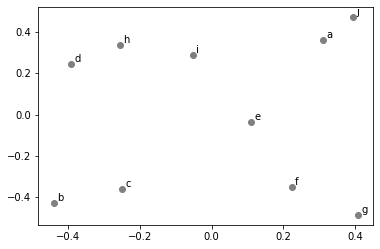

In [42]:
# For non-metric data such as rankings or categorical variables, you pass the metric=False argument
# to the sklearn.manifold.MDS.

# We see that brand positions in the non-metric solution are considerably different, but most of
# the nearest neighbors of brands are largely consistent with the exception of brands b and c, which
# are separated quite a bit more than in the metric solution. This occurs because the rank-order 
# procedure loses some of the information that is present in the original metric data solution.
brand_mds_nonmetric = manifold.MDS(metric=False)\
  .fit_transform(brand_ranks)
plt.scatter(x=brand_mds_nonmetric[:,0],
            y=brand_mds_nonmetric[:,1],
            color='grey')
for i,p in enumerate(brand_mds_nonmetric):
  plt.annotate(s=brand_means.index[i], xy=p+.01)

### t-distributed Stochastic Neighbor Embedding (t-SNE)
Visualizing high-dimensional data is difﬁcult, as we are effectively limited to two dimensions. PCA can be used to reduce
dimensionality to two dimensions, but the resulting scatterplots are often very difﬁcult to interpret. There are several non-
linear dimensionality reduction tools that are explicitly tailored to visualization, representing high-dimensional structure in
two dimensions: t-SNE: Primarily used for visualizing high-dimensional systems, such as the high-level representations learned by a neural network
architecture. It is sensitive to the specific parameters, and is stochastic, so each time it is run the representation will be
different. But it does an excellent job at highlighting high-dimensional structure in the data.

In [43]:
brand_tsne = manifold.TSNE().fit_transform(brand_ratings_sc_vals)
brand_tsne_df = pd.DataFrame(brand_tsne, columns=['x', 'y'])
brand_tsne_df['brand'] = brand_ratings_sc.brand

Text(0.5, 1.0, 't-SNE')

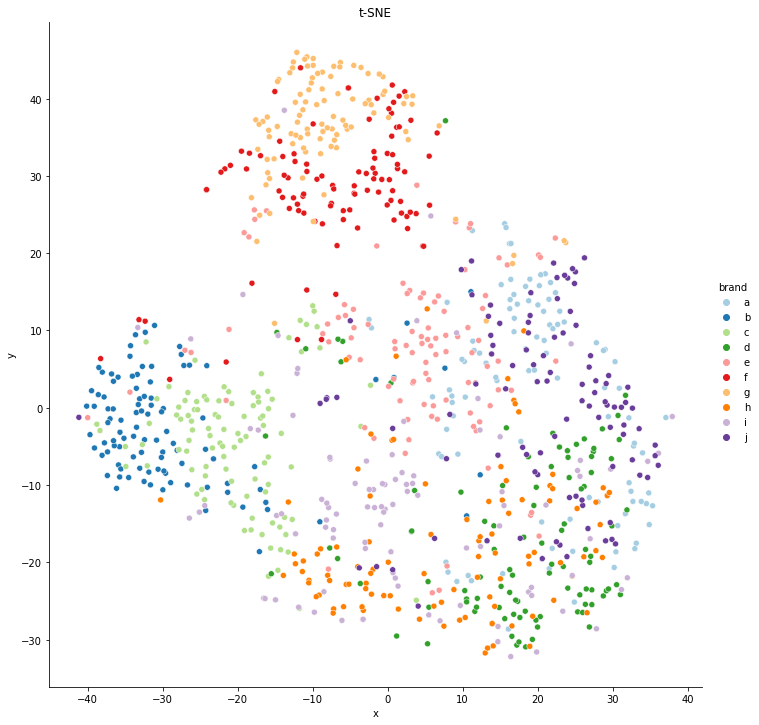

In [44]:
# Similar brands are clustered together.
sns.pairplot(brand_tsne_df, x_vars=['x'], y_vars=['y'],
             hue='brand', height=10,
             palette=sns.color_palette('Paired', n_colors=10))
plt.title('t-SNE')

In [45]:
import sys
!{sys.executable} -m pip install umap-learn

You should consider upgrading via the 'C:\Users\Stefan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [46]:
# We can also use a similar technique, Uniform Manifold Approximation and Projection, or UMAP,
# another dimensionality reduction technique for visualizing high-dimensional structure in two
# dimensions. The mechanics of training a UMAP model and visualizing the transformed data are
# similar to t-SNE.

import umap

brand_embedding = umap.UMAP().fit_transform(brand_ratings_sc_vals)
brand_umap_df = pd.DataFrame(brand_embedding, columns=['x', 'y'])
brand_umap_df['brand'] = brand_ratings_sc.brand

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'UMAP')

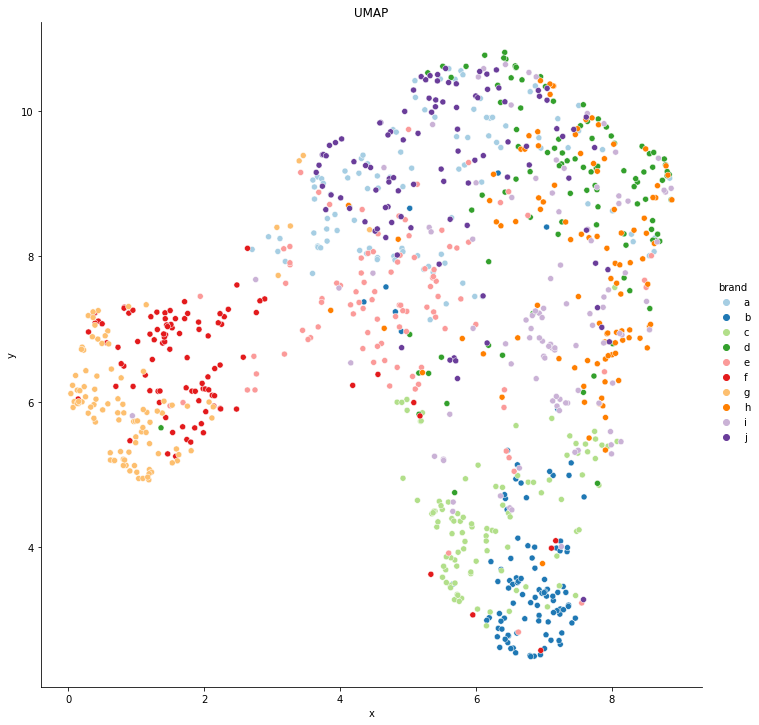

In [47]:
sns.pairplot(brand_umap_df, x_vars=['x'], y_vars=['y'],
             hue='brand', size=10,
             palette=sns.color_palette('Paired', n_colors=10))
plt.title('UMAP')

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PCA')

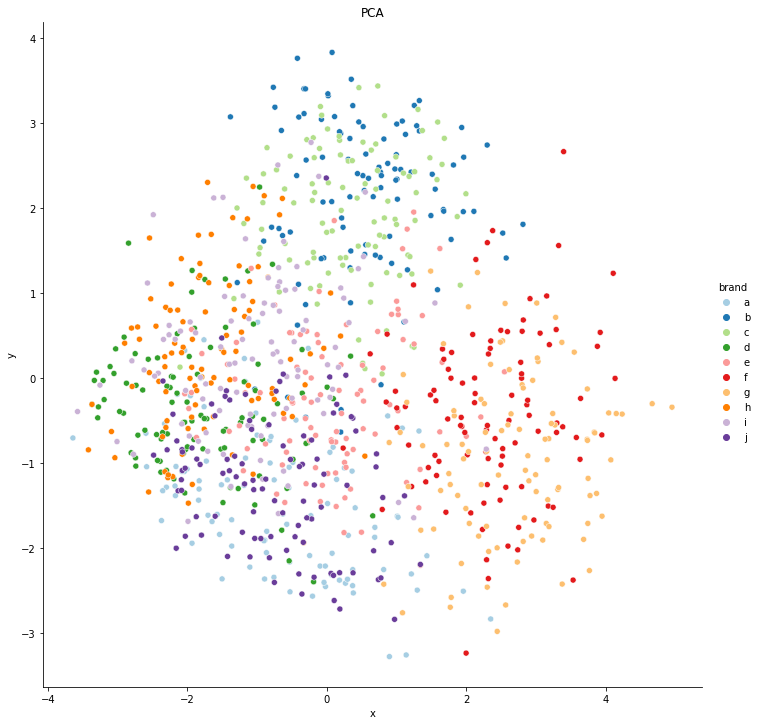

In [48]:
df = pd.DataFrame(brand_ratings_sc_trans[:,:2], columns=['x', 'y'])
df['brand'] = brand_ratings.brand
sns.pairplot(df, x_vars=['x'], y_vars=['y'],
             hue='brand', size=10,
             palette=sns.color_palette('Paired', n_colors=10))
plt.title('PCA')

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'EFA')

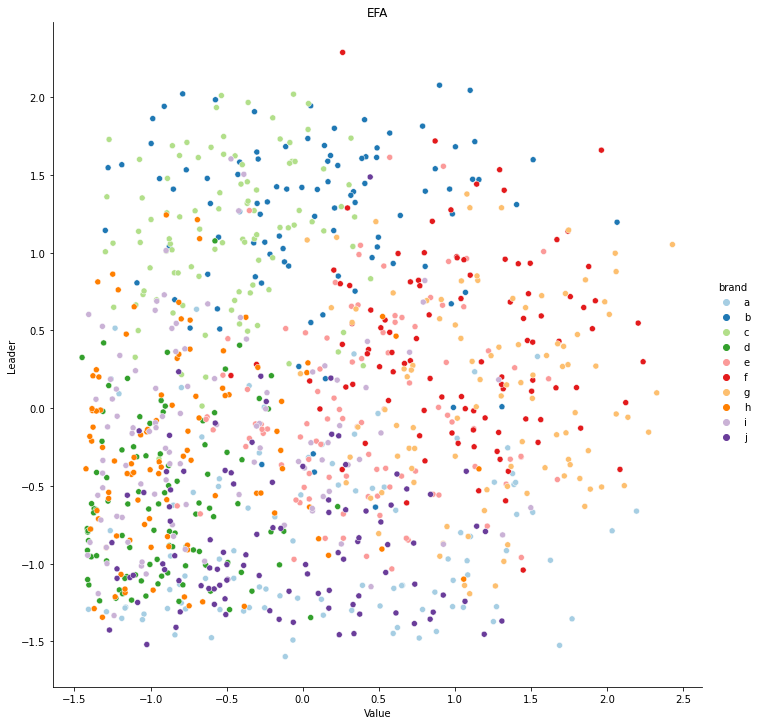

In [49]:
df = pd.DataFrame(brand_rating_fa_scores.iloc[:,:2])
df['brand'] = brand_ratings.brand
sns.pairplot(df, x_vars=[0], y_vars=[1],
             hue='brand', size=10,
             palette=sns.color_palette('Paired', n_colors=10))
plt.xlabel('Value')
plt.ylabel('Leader')
plt.title('EFA')

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'MDS')

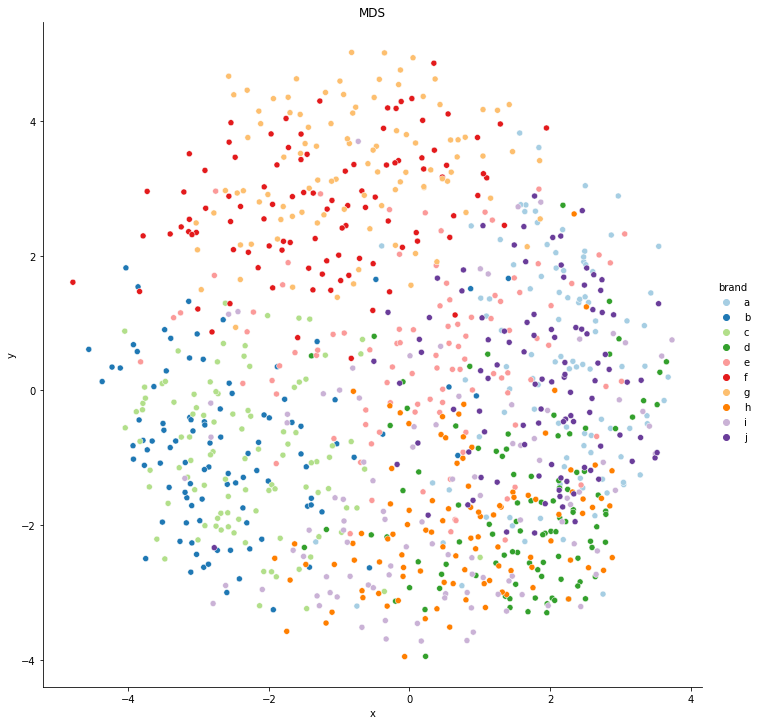

In [50]:
mds = manifold.MDS().fit_transform(brand_ratings_sc_vals)
df = pd.DataFrame(mds, columns=['x', 'y'])
df['brand'] = brand_ratings.brand
sns.pairplot(df, x_vars=['x'], y_vars=['y'],
             hue='brand', size=10,
             palette=sns.color_palette('Paired', n_colors=10))
plt.title('MDS')